In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../input/machine-predictive-maintenance-classification/predictive_maintenance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.shape

(10000, 10)

In [5]:
data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [6]:
del data['UDI']
del data['Product ID']

In [7]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


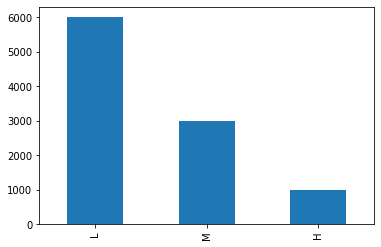

In [9]:
data['Type'].value_counts().plot(kind='bar');

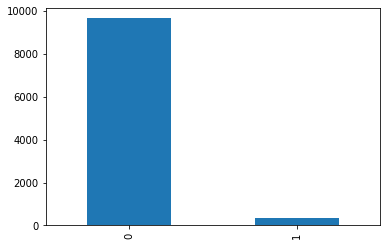

In [10]:
data['Target'].value_counts().plot(kind='bar');

In [11]:
X=data[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y=data[['Target']]


In [12]:
X.shape,y.shape

((10000, 6), (10000, 1))

In [13]:
X.shape,y.shape

((10000, 6), (10000, 1))

In [14]:
X=X.values
y=y.values

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

In [17]:
X=ct1.fit_transform(X)


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
#y=y.reshape(-1,1)
y=le.fit_transform(y.ravel())

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

In [22]:
y_train=np.array(y_train)

In [23]:
#Oversampling 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_resample(X_train, y_train) 

#undersampling 
# from imblearn.under_sampling import NearMiss

# nm = NearMiss()
# X_res,y_res=nm.fit_sample(X_train,y_train)

In [24]:
X_res.shape,y_res.shape

((15460, 8), (15460,))

In [25]:
X_res = sc.fit_transform(X_res)
X_test = sc.transform(X_test)

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_res, y_res)

SVC(random_state=0)

In [27]:
y_pred=classifier.predict(X_test)

In [28]:
#y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 0]
 [1 0]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[991 940]
 [ 11  58]]


0.5245

In [30]:
recall_score(y_test,y_pred)

0.8405797101449275

In [31]:
precision_score(y_test,y_pred)

0.05811623246492986

In [32]:
f1_score(y_test,y_pred)

0.10871602624179945